# Logistic Regression and Support Vector Machine Mini Project 

## Team Member Names:

Name 1: Rajeev Kumar  
Name 2: Araya Messa  
Name 3: Manjula Kottegoda

## Date : 02/19/2017

## Objective and Background (Business Understanding)
 
The objective of this project is to perform a predictive analysis and classification on the English league soccer data using the Logistic Regression and Support vector machine (SVM) algorithms. The end goal being that we could predict a home win with a reasonable degree of accuracy.
 
The Dataset consists of games played in English soccer for the timespan of 2008 - 2016. The Dataset was gathered from the  larger the European soccer league dataset that is published in Kaggle [1].
 
As part of the project we will build several Logistic Regression and SVM models and adjust the relevant parameters to increase accuracy while maintaining the models' robustness.

## Data Descriptions (Data Understanding)
 
First we import the data from the sqllite database consisting of the following tables.
 
The dataset consists of a SQLite database with the following tables.
 
#### Country
Consists of the countries that participates in the leagues that makes up the dataset
#### League
List of 10 European leagues such as English Premier League , Bundesliga and Spanish LIGA
#### Match
This is a large data table consisting of almost 26,000 matches played between 2008-2016 seasons. The dataset is rich in information that covers a wide variety of attributes as well as betting odds set forth that major bookies across the globe. Some interesting attributes of this dataset consists of
#### League
Season
Home Team Score
Away Team Score
All players : All players in lineup
Goal attempt details: XML data consisting of players who attempted to score with result
Penalties
#### Player
This tables gives some basic statistics of the players such as,
Name
Player IDs
Birthday to derive age
Weight
Height
#### Player Attributes
This table breaks down the players into minute details on a multitude of physical and skill attributes. Following are some interesting attributes in this table are
Overall Rating of player
Potential of player
Left-footed or Right-footed
Crossing
Heading accuracy
Dribbling
Various Kicking accuracies
Ball control
Speed
Stamina
Balance
Aggression
Various Defensive traits
#### Team
Teams names
#### Team Attributes
Lists a variety of offensive and defensive attributes as well as some classifications
buildUpPlaySpeed
buildUpPlaySpeedClass
buildUpPlayDribbling
buildUpPlayDribblingClass
buildUpPlayPassing
buildUpPlayPassingClass
buildUpPlayPositioningClass
chanceCreationPassing
chanceCreationPassingClass
chanceCreationCrossing
chanceCreationCrossingClass
chanceCreationShooting
chanceCreationShootingClass
chanceCreationPositioningClass
defencePressure

## Data Preparation
### The dataset is loaded into pandas dataframe and are prepared for classification using the python scikit-learn libraries.

In [76]:
## Data loading - Reading Data from SQLite3 with Pandas

import sqlite3
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from __future__ import print_function
#Define Connection Object "con" to connect to sqllite database
con = sqlite3.connect('data/database.sqlite') 
#List files in the directory "data" 
#print(check_output(["ls","data"]).decode("utf8"))

## Query data from tables through a join and load it into a panda frames for analysis

In [77]:

# Read Match Data From SQLLite Database into a Data Frame
match_attr = pd.read_sql('Select Mt.home_team_api_id,Mt.home_player_1,Mt.home_player_2,Mt.home_player_3,Mt.home_player_4,Mt.home_player_5,Mt.home_player_6,Mt.home_player_7,Mt.home_player_8,Mt.home_player_9,Mt.home_player_10,Mt.home_player_11,Mt.country_id, home_team_goal,away_team_goal, Match_year, buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing, buildUpPlayDribbling, buildUpPlayPassing, defencePressure ,chanceCreationShooting, defenceAggression, defenceTeamWidth From Match Mt Inner Join(Select team_attributes.team_api_id as home_team_api_id, home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11, CAST(SUBSTR(match.date,1,4) AS Integer) As Match_year, avg(buildUpPlaySpeed) as buildUpPlaySpeed, avg(chanceCreationPassing) as chanceCreationPassing, avg(chanceCreationCrossing) as chanceCreationCrossing, avg(buildUpPlayDribbling) as buildUpPlayDribbling,avg(buildUpPlayPassing) as buildUpPlayPassing,avg(chanceCreationShooting) as chanceCreationShooting,avg(defencePressure) as defencePressure,avg(defenceAggression) as defenceAggression,avg(defenceTeamWidth) as defenceTeamWidth  From Match Inner Join team_attributes on Match.home_team_api_id= team_attributes.team_api_id And SUBSTR(match.date,1,4)=SUBSTR(team_attributes.date,1,4) Where country_id =1729 Group By team_attributes.team_api_id, SUBSTR(match.date,1,4)) team_atr on MT.home_team_api_id=team_atr.home_team_api_id Where country_id =1729',con)
#print(type(match_attr))

# Read players Data From SQLLite Database into a Data Frame and compute average player's ratings.
players_attr=pd.read_sql('Select player_api_id, avg(overall_rating) as avg_player_rating From Player_attributes where overall_rating is not null group by player_api_id',con)

#Join match data with Player's data on keys home_player_1 and player_api_id
match_players_1=match_attr.set_index('home_player_1').join(players_attr.set_index('player_api_id'),rsuffix='_1')
match_players_2=match_players_1.set_index('home_player_2').join(players_attr.set_index('player_api_id'),rsuffix='_1')
match_players_3=match_players_2.set_index('home_player_3').join(players_attr.set_index('player_api_id'),rsuffix='_2')
match_players_4=match_players_3.set_index('home_player_4').join(players_attr.set_index('player_api_id'),rsuffix='_3')
match_players_5=match_players_4.set_index('home_player_5').join(players_attr.set_index('player_api_id'),rsuffix='_4')
match_players_6=match_players_5.set_index('home_player_6').join(players_attr.set_index('player_api_id'),rsuffix='_5')
match_players_7=match_players_6.set_index('home_player_7').join(players_attr.set_index('player_api_id'),rsuffix='_6')
match_players_8=match_players_7.set_index('home_player_8').join(players_attr.set_index('player_api_id'),rsuffix='_7')
match_players_9=match_players_8.set_index('home_player_9').join(players_attr.set_index('player_api_id'),rsuffix='_8')
match_players_10=match_players_9.set_index('home_player_10').join(players_attr.set_index('player_api_id'),rsuffix='_9')
match_players_11=match_players_10.set_index('home_player_11').join(players_attr.set_index('player_api_id'),rsuffix='_10')

goals_home = match_players_11.home_team_goal
goals_away = match_players_11.away_team_goal
print(match_players_11.head())
#print(goals_home.head())
#print(goals_away.head())

# Compute and Add outcome variable "Home_win" to dataset
match_players_11['Home_win'] = match_players_11['home_team_goal']>match_players_11['away_team_goal']
#match_attr.Away_win = match_attr.home_team_goal<match_attr.away_team_goal
#match_attr.Draw = match_attr.home_team_goal==match_attr.away_team_goal

# Replace missing values with means in the dataset
match_players_11=match_players_11.fillna(match_players_11.mean())


        home_team_api_id  country_id  home_team_goal  away_team_goal  \
2802.0             10003        1729               2               3   
2802.0             10003        1729               2               3   
2802.0             10003        1729               2               3   
2802.0             10003        1729               2               3   
2802.0             10003        1729               2               3   

        Match_year  buildUpPlaySpeed  chanceCreationPassing  \
2802.0        2011              66.0                   52.0   
2802.0        2012              26.0                   62.0   
2802.0        2013              41.0                   36.0   
2802.0        2014              63.0                   34.0   
2802.0        2015              45.0                   34.0   

        chanceCreationCrossing  buildUpPlayDribbling  buildUpPlayPassing  \
2802.0                    51.0                   NaN                34.0   
2802.0                    39.0      

## Review Dataset

In [78]:
# 1. Remove attributes that just arent useful for us
del match_players_11['home_team_api_id']
del match_players_11['home_team_goal']
del match_players_11['away_team_goal']
del match_players_11['buildUpPlayDribbling']
del match_players_11['country_id']

match_players_11.info()
match_players_11.describe()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 15466 entries, 2802.0 to nan
Data columns (total 21 columns):
Match_year                15466 non-null int64
buildUpPlaySpeed          15466 non-null float64
chanceCreationPassing     15466 non-null float64
chanceCreationCrossing    15466 non-null float64
buildUpPlayPassing        15466 non-null float64
defencePressure           15466 non-null float64
chanceCreationShooting    15466 non-null float64
defenceAggression         15466 non-null float64
defenceTeamWidth          15466 non-null float64
avg_player_rating         15466 non-null float64
avg_player_rating_1       15466 non-null float64
avg_player_rating_2       15466 non-null float64
avg_player_rating_3       15466 non-null float64
avg_player_rating_4       15466 non-null float64
avg_player_rating_5       15466 non-null float64
avg_player_rating_6       15466 non-null float64
avg_player_rating_7       15466 non-null float64
avg_player_rating_8       15466 non-null float64
avg_pl

,Match_year,buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing,buildUpPlayPassing,defencePressure,chanceCreationShooting,defenceAggression,defenceTeamWidth,avg_player_rating,avg_player_rating_1,avg_player_rating_2,avg_player_rating_3,avg_player_rating_4,avg_player_rating_5,avg_player_rating_6,avg_player_rating_7,avg_player_rating_8,avg_player_rating_9,avg_player_rating_10
count,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000
mean,2012.480344,56.414005,49.933661,56.540541,51.401720,44.454545,52.103194,49.945946,50.604423,76.646802,73.181272,75.453788,75.668036,73.165084,75.174835,75.122779,75.087346,76.018721,76.002735,76.009474
std,1.693076,11.219723,11.211340,11.672925,12.843144,9.706553,11.459803,10.498708,8.434483,4.659934,4.275053,4.544350,4.801165,5.028688,4.879402,4.820074,4.822114,5.105440,5.079166,5.201523
min,2010.000000,25.000000,28.000000,30.000000,24.000000,25.000000,24.000000,28.000000,30.000000,55.312500,53.500000,59.142857,55.833333,54.166667,54.800000,54.800000,57.520000,57.520000,51.000000,59.625000
25%,2011.000000,48.000000,41.000000,48.000000,40.000000,38.000000,45.000000,41.000000,45.000000,73.700000,70.333333,72.304348,73.000000,70.142857,72.175556,72.000000,71.694444,72.538462,72.724138,72.527778
50%,2012.000000,59.000000,49.000000,58.000000,51.000000,43.000000,54.000000,49.500000,51.000000,76.111111,72.906250,75.480000,76.095238,71.965517,75.147059,75.147059,74.593750,75.666667,75.393939,75.666667
75%,2014.000000,65.000000,57.000000,68.000000,60.000000,50.000000,60.000000,58.000000,56.000000,80.440000,76.310345,78.850000,78.925926,76.428571,78.758621,78.758621,78.818182,79.275862,79.628036,79.200000
max,2015.000000,77.000000,72.000000,76.000000,80.000000,70.000000,80.000000,70.000000,70.000000,85.272727,84.703704,85.250000,85.250000,85.250000,91.280000,87.222222,87.222222,91.280000,91.280000,87.222222


   # Cross validation criteria
For this project we will be using a 80:20 split to cross validate where 80% of the data will be used for training and 20% for testing. Moreover, we iterate the process of separating the testing and training data three times. K-fold cross validation is one way to improve over the holdout method. [9] While 10 fold is common practice, for this project three iterations will be used as a reasonable compromise between accuracy and performance. 

In [79]:
from sklearn.model_selection import ShuffleSplit
# we want to predict the X and y data as follows:
if 'Home_win' in match_players_11:
    y = match_players_11['Home_win'].values # get the labels we want to predict
    del match_players_11['Home_win'] # get rid of the class label to leave the predictors only
    X = match_players_11.values # use all the predictors!

#print(np.matrix(y))  
#print(np.matrix(X)) 

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


# Model Building 

## 1. - Logistic regression

We use the LogisticRegression method found within scikit-learn library.[7]

Parameters:
penalty : str, ‘l1’ or ‘l2’, default: ‘l2’
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
 
C : float, default: 1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
 
class_weight : dict or ‘balanced’, default: None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

In [80]:
# Run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import time

# First we create a reusable logisitic regression object with "L1" penalty
lr_clf = LogisticRegression(penalty='l1', C=1, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets.  data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    start_time=time.time()
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    print("--- %s seconds ---" % (time.time() - start_time))

# Exceptional Work : We are capturing time and accuracy to be plotted later
model_acc=dict()
model_time=dict()

model_acc['LR-Model(L1)'] = acc
model_time['LR-Model(L1)']= (time.time() - start_time)

====Iteration 0  ====
accuracy 0.62734324499
confusion matrix
 [[1131  491]
 [ 662  810]]
--- 38.04384183883667 seconds ---
====Iteration 1  ====
accuracy 0.635423400129
confusion matrix
 [[1173  447]
 [ 681  793]]
--- 34.00266885757446 seconds ---
====Iteration 2  ====
accuracy 0.634453781513
confusion matrix
 [[1176  473]
 [ 658  787]]
--- 32.057724952697754 seconds ---


In [81]:
# Now create a reusable logisitic regression object with 'L2' penality 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import time
lr_clf = LogisticRegression(penalty='l2', C=1, class_weight=None) 

iter_num=0
for train_indices, test_indices in cv_object.split(X,y): 
    start_time=time.time()
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)  
    y_hat = lr_clf.predict(X_test) 
    
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    print("--- %s seconds ---" % (time.time() - start_time))


model_acc['LR-Model(L2)'] = acc
model_time['LR-Model(L2)']= (time.time() - start_time)
print(model_acc)
print(model_time)

====Iteration 0  ====
accuracy 0.625404007757
confusion matrix
 [[1147  479]
 [ 680  788]]
--- 0.16556715965270996 seconds ---
====Iteration 1  ====
accuracy 0.626050420168
confusion matrix
 [[1145  414]
 [ 743  792]]
--- 0.18277406692504883 seconds ---
====Iteration 2  ====
accuracy 0.636393018746
confusion matrix
 [[1176  451]
 [ 674  793]]
--- 0.2046060562133789 seconds ---
{'LR-Model(L2)': 0.63639301874595988, 'LR-Model(L1)': 0.63445378151260501}
{'LR-Model(L2)': 0.20473003387451172, 'LR-Model(L1)': 32.05976891517639}


In [56]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd
from sklearn.model_selection import cross_val_score
def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) 
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

[ 0.62281836  0.6354234   0.63251454]


#### It seems cost (C) close and equal to 3 gives the highest accuracy.

# Interpreting weights


In [82]:
# Weights
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = match_players_11.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

Match_year has weight of -0.00627202060693
buildUpPlaySpeed has weight of -0.00444931033839
chanceCreationPassing has weight of -0.00401146120527
chanceCreationCrossing has weight of 0.00858080957387
buildUpPlayPassing has weight of -0.00165115279989
defencePressure has weight of 0.00582043497394
chanceCreationShooting has weight of -0.000977354611652
defenceAggression has weight of -0.00300061789557
defenceTeamWidth has weight of -0.00464647049639
avg_player_rating has weight of 0.00949647660199
avg_player_rating_1 has weight of 0.00981896421967
avg_player_rating_2 has weight of 0.0171836580908
avg_player_rating_3 has weight of 0.0239395620137
avg_player_rating_4 has weight of -0.00974297727633
avg_player_rating_5 has weight of 0.0254433273114
avg_player_rating_6 has weight of -0.00136381225257
avg_player_rating_7 has weight of 0.028054778793
avg_player_rating_8 has weight of 0.0342003947396
avg_player_rating_9 has weight of 0.0296631343627
avg_player_rating_10 has weight of 0.0020079

In [83]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) 
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,match_players_11.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now printing them out


accuracy: 0.636716224952
[[1175  452]
 [ 672  795]]
buildUpPlaySpeed has weight of -0.0482531319353
avg_player_rating_4 has weight of -0.0481753622238
chanceCreationPassing has weight of -0.0404520815806
defenceTeamWidth has weight of -0.0365703812992
buildUpPlayPassing has weight of -0.0227364015136
defenceAggression has weight of -0.00728990118939
avg_player_rating_6 has weight of -0.00382468433062
chanceCreationShooting has weight of -0.00338830071831
avg_player_rating_10 has weight of 0.0119955470026
Match_year has weight of 0.0375083680379
avg_player_rating_1 has weight of 0.0415672014979
defencePressure has weight of 0.0418038221149
avg_player_rating has weight of 0.0422355155176
avg_player_rating_2 has weight of 0.0805266860936
chanceCreationCrossing has weight of 0.112074649761
avg_player_rating_3 has weight of 0.114892156859
avg_player_rating_5 has weight of 0.124825759409
avg_player_rating_7 has weight of 0.133389524477
avg_player_rating_9 has weight of 0.150296719642
avg_pla

#### Based on weights we are not able to find significant attributes contributing to the result because predictors are on different scales. We need to standardize the data to gain a better understanding.

### Visualization of weights before Normalization shown below

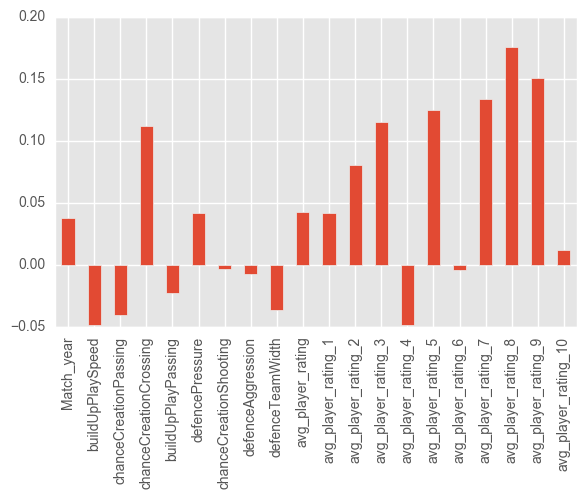

In [84]:
# Now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0],index=match_players_11.columns)
weights.plot(kind='bar')
plt.show()

## Normalize data

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipeline
piped_object = Pipeline([('scale', std_scl),  # this
                         ('logit_model', lr_clf)]) # and then this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

###  _Visualization of weights with confidence intervals after Normalization shown below_


In [86]:
import plotly
plotly.offline.init_notebook_mode() # run at the start of every notebook

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': match_players_11.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

#### _We can now look for attributes with weights closed to 0 and confidence interval containing 0 and remove them from the model_

###  _Visualization of weights after keeping only statistically significant predictors_

In [87]:
Xnew = match_players_11[['chanceCreationPassing','chanceCreationCrossing','defencePressure','defenceTeamWidth','avg_player_rating_1', 'avg_player_rating_2', 'avg_player_rating_3', 'avg_player_rating_4', 'avg_player_rating_5',  'avg_player_rating_7', 'avg_player_rating_8', 'avg_player_rating_9']].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    piped_object.fit(Xnew[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['chanceCreationPassing','chanceCreationCrossing','defencePressure','defenceTeamWidth','avg_player_rating_1', 'avg_player_rating_2', 'avg_player_rating_3', 'avg_player_rating_4', 'avg_player_rating_5',  'avg_player_rating_7', 'avg_player_rating_8', 'avg_player_rating_9'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

## Interpreting the importance of different features using weights
 Based on the weight criteria as calculated above and shown on the plots, we found that player's ratings to be most significant factor in predicting Home Win. Second and third most significant factors were ChanceCreationCrossing and ChanceCreationPassing. DefensePressure and ChanceCreationShooting were not significant factors in predicting home win. 

## 2. - Support Vector Machine Model (SVM)

#### _We used the previous training and testing attributes (scaled) to investigate the weights and support vectors_

In [88]:
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 



In [90]:
# lets investigate SVMs on the data based on the parameters and kernels
import time
start_time=time.time()

from sklearn.svm import SVC

# train the model just as before with kernel linear
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)
print("--- %s seconds ---" % (time.time() - start_time))

model_acc['SVM-Model(Linear)'] = acc
model_time['SVM-Model(Linear)']= (time.time() - start_time)
print(model_acc)
print(model_time)

accuracy: 0.634453781513
[[1190  430]
 [ 701  773]]
--- 22.776937007904053 seconds ---
{'SVM-Model(Linear)': 0.63445378151260501, 'LR-Model(L2)': 0.63639301874595988, 'LR-Model(L1)': 0.63445378151260501}
{'SVM-Model(Linear)': 22.777014017105103, 'LR-Model(L2)': 0.20473003387451172, 'LR-Model(L1)': 32.05976891517639}


###  _Visualization of weights For SVM Linear Model_

[[ 0.02300714  0.02708764 -0.07988465  0.11159505 -0.09795306  0.06632366
   0.00709707  0.01777184  0.01590947  0.07319334  0.06875548  0.09858156
   0.10229207  0.04233081  0.09719852  0.04135494  0.14497812  0.21547311
   0.15091332  0.01399096]]


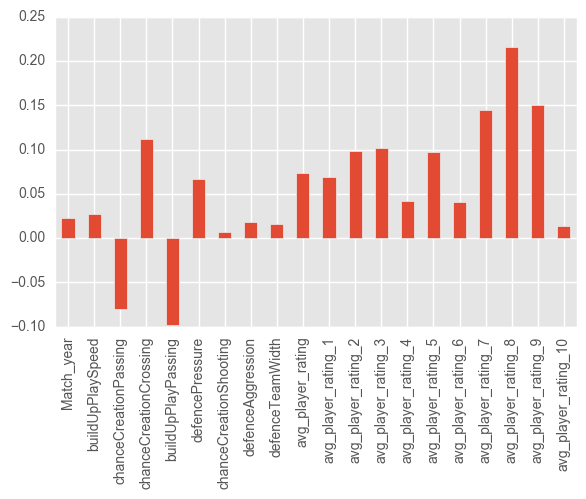

In [91]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=match_players_11.columns)
weights.plot(kind='bar')

In [19]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(9857, 20)
(9857,)
[4929 4928]


#### _Support vectors define the margins or any slack variables in the dataset. In this model we see that there are 9857 support vectors. 4928 support vectors from the winning outcome and 4929 from the losing outcome._

In [92]:
# make a dataframe of the training data
df_tested_on = match_players_11.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]
df_support['Home_win'] = y[svm_clf.support_] # add back in the 'Homewin' Column to the pandas dataframe
match_players_11['Home_win'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9876 entries, 113836.0 to 30988.0
Data columns (total 21 columns):
Match_year                9876 non-null int64
buildUpPlaySpeed          9876 non-null float64
chanceCreationPassing     9876 non-null float64
chanceCreationCrossing    9876 non-null float64
buildUpPlayPassing        9876 non-null float64
defencePressure           9876 non-null float64
chanceCreationShooting    9876 non-null float64
defenceAggression         9876 non-null float64
defenceTeamWidth          9876 non-null float64
avg_player_rating         9876 non-null float64
avg_player_rating_1       9876 non-null float64
avg_player_rating_2       9876 non-null float64
avg_player_rating_3       9876 non-null float64
avg_player_rating_4       9876 non-null float64
avg_player_rating_5       9876 non-null float64
avg_player_rating_6       9876 non-null float64
avg_player_rating_7       9876 non-null float64
avg_player_rating_8       9876 non-null float64
avg_player_rating_9

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



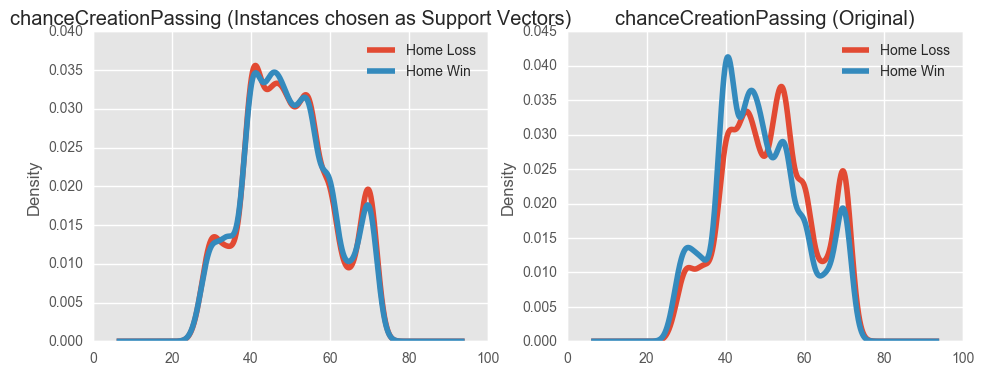

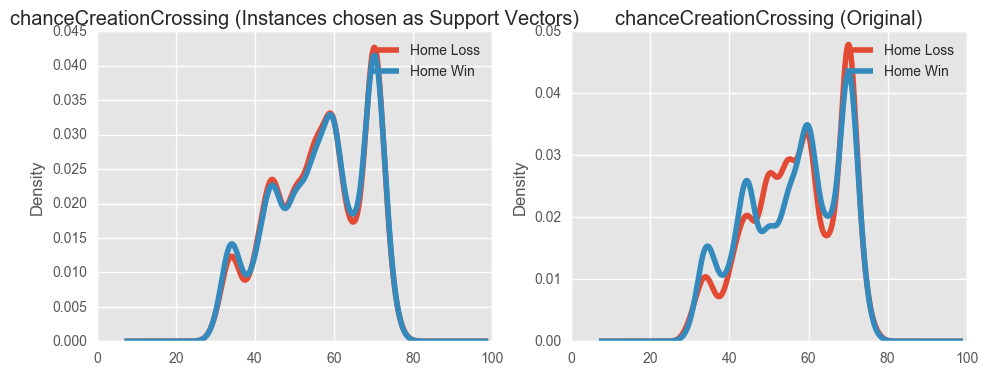

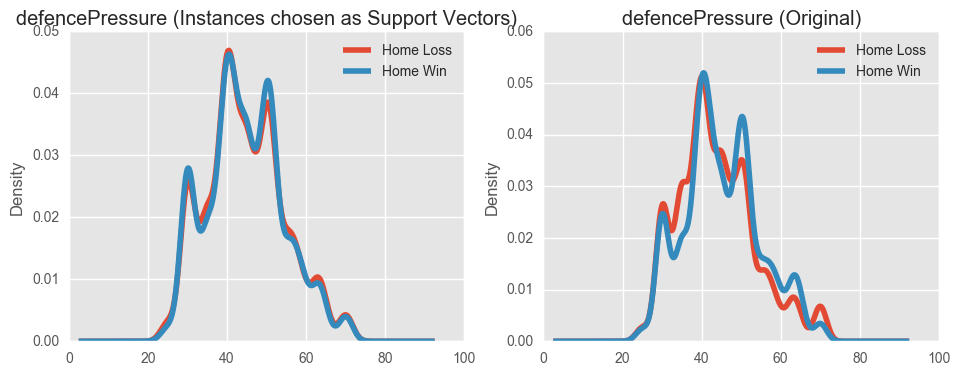

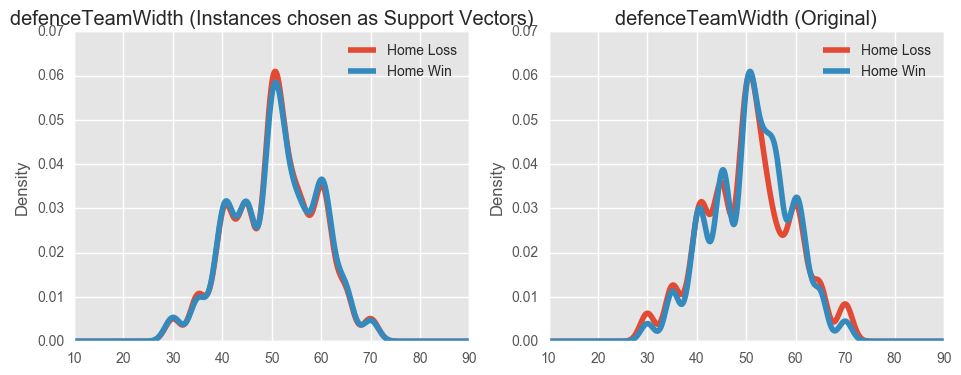

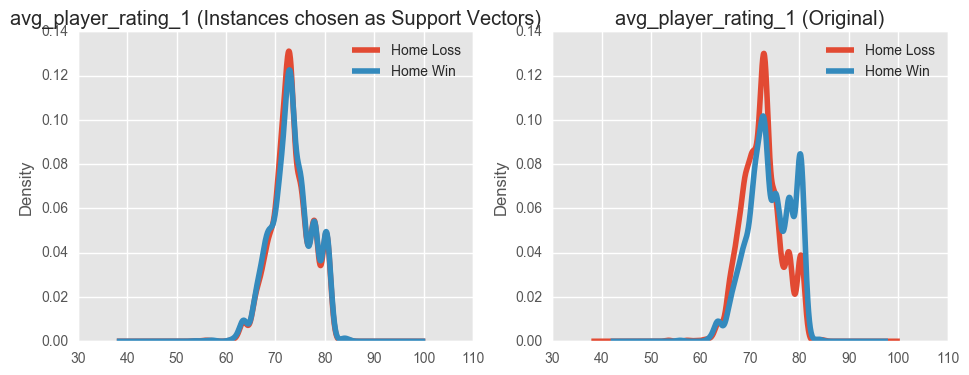

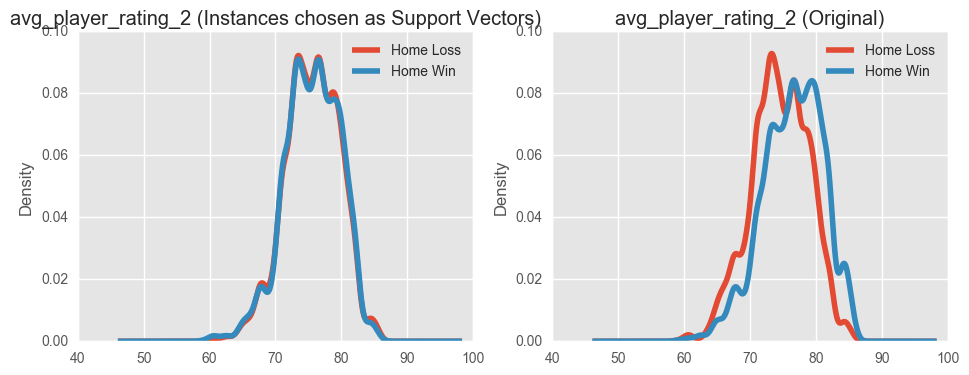

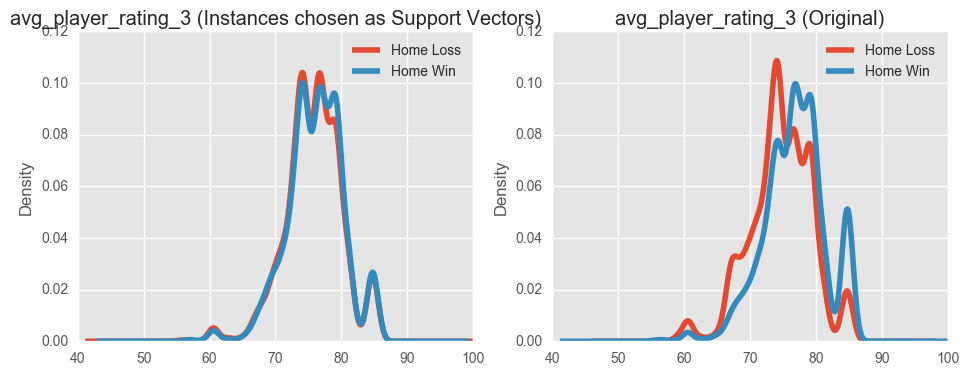

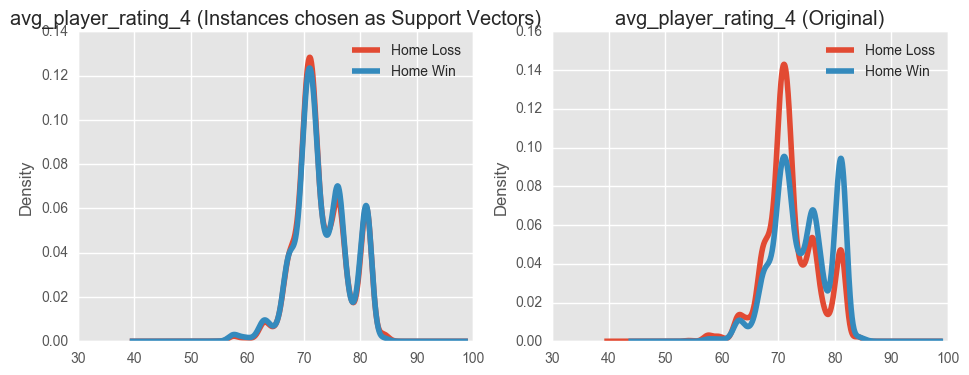

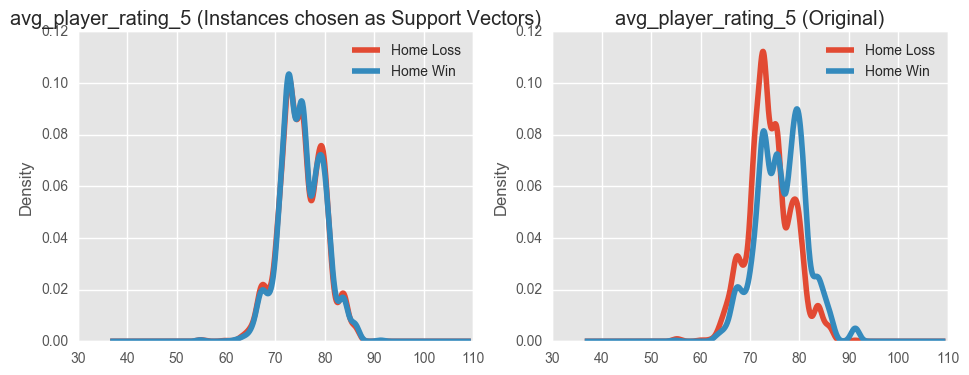

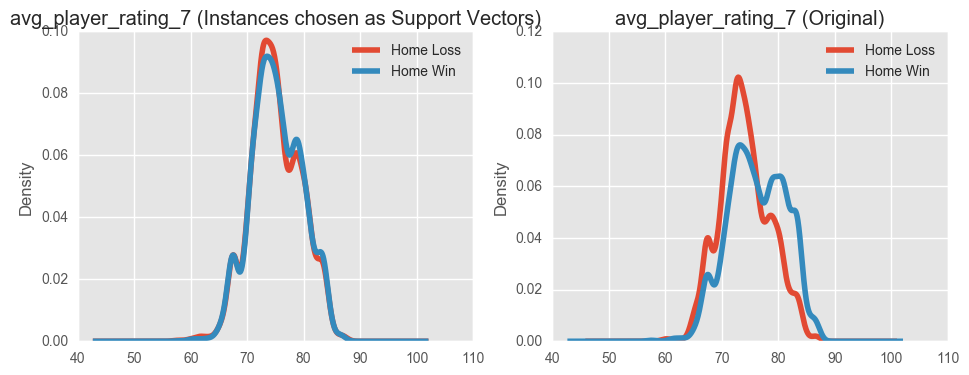

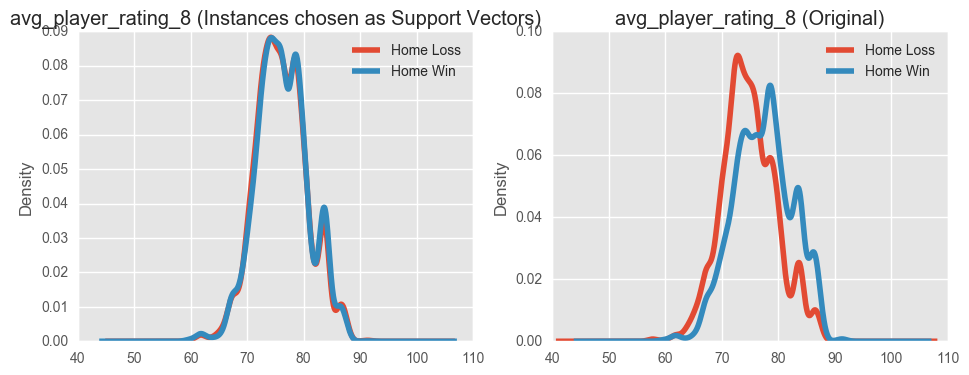

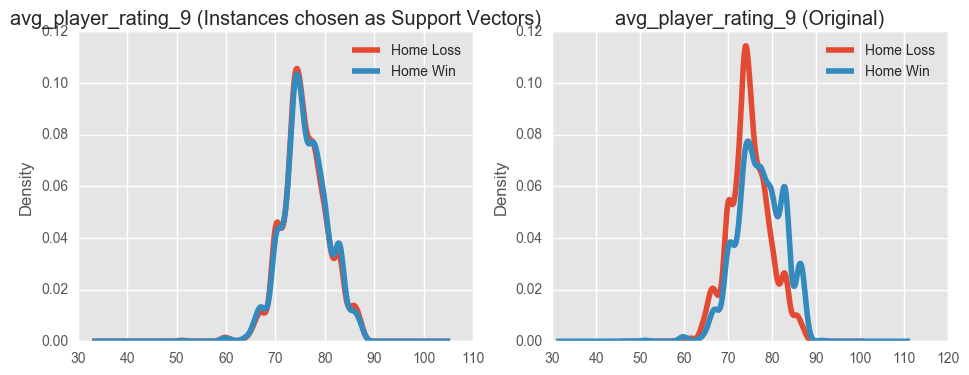

In [93]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Home_win'])
df_grouped = match_players_11.groupby(['Home_win'])

# plot KDE of Different variables
vars_to_plot = ['chanceCreationPassing','chanceCreationCrossing','defencePressure','defenceTeamWidth','avg_player_rating_1', 'avg_player_rating_2', 'avg_player_rating_3', 'avg_player_rating_4', 'avg_player_rating_5',  'avg_player_rating_7', 'avg_player_rating_8', 'avg_player_rating_9']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Home Loss','Home Win'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Home Loss','Home Win'])
    plt.title(v+' (Original)')



#### _The graphic above shows the statistics of the model and the original data side by side. The separation in the SVM model is not as pronounced as the original data. Reason being that the support vectors are located at the very edge of the class boundaries and as such the two classes map closely._

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



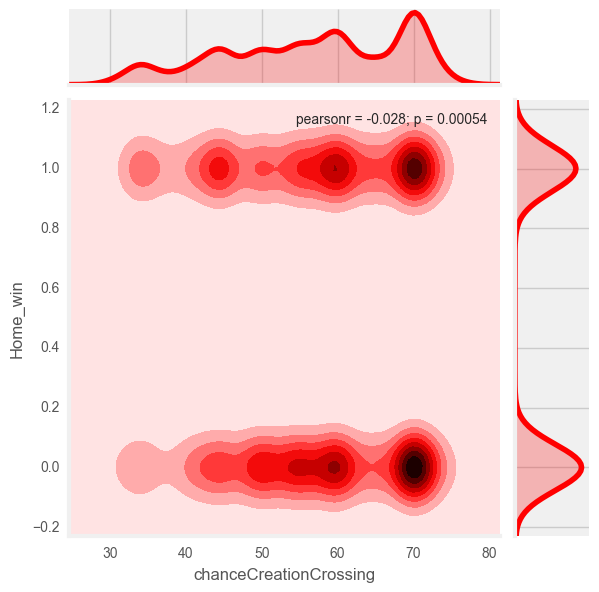

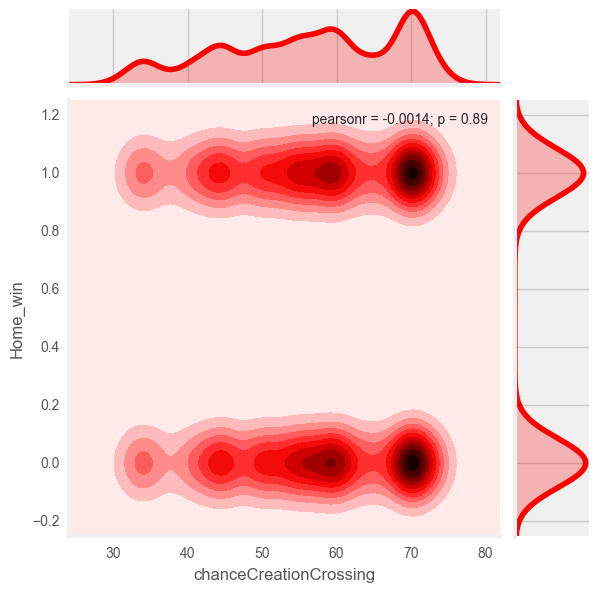

In [70]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

#print(df_support.info()) 
#print(match_players_11.info()) 

plt.figure(figsize=(10,4))
# Original Data
graph = sns.jointplot('chanceCreationCrossing', 'Home_win', data=match_players_11,color='r',kind="kde")
# Support Vectors
graph = sns.jointplot('chanceCreationCrossing', 'Home_win', data=df_support,color='r',kind="kde")


#### _  To better examine the change in the relationships after SVM we have the joint plots above. We found that after SVM relationship becomes significant (p=0.89) between Home_win and chanceCreationCrossing._

In [94]:
# Now lets use the rbf kernel
import time
start_time=time.time()

from sklearn.svm import SVC

# train the model just as before with kernel rbf
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

print("--- %s seconds ---" % (time.time() - start_time))

model_acc['SVM-Model(RBF)'] = acc
model_time['SVM-Model(RBF)']= (time.time() - start_time)
print(model_acc)
print(model_time)

accuracy: 0.643503555268
[[1222  398]
 [ 705  769]]
--- 12.116037130355835 seconds ---
{'SVM-Model(Linear)': 0.63445378151260501, 'SVM-Model(RBF)': 0.6435035552682612, 'LR-Model(L2)': 0.63639301874595988, 'LR-Model(L1)': 0.63445378151260501}
{'SVM-Model(Linear)': 22.777014017105103, 'SVM-Model(RBF)': 12.116116046905518, 'LR-Model(L2)': 0.20473003387451172, 'LR-Model(L1)': 32.05976891517639}


# Model Comparison 

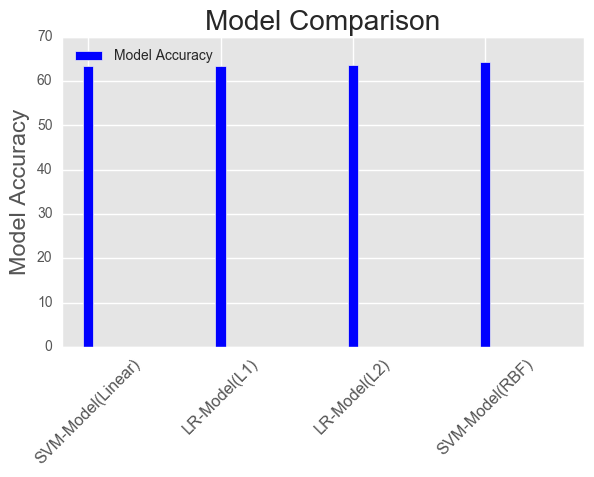

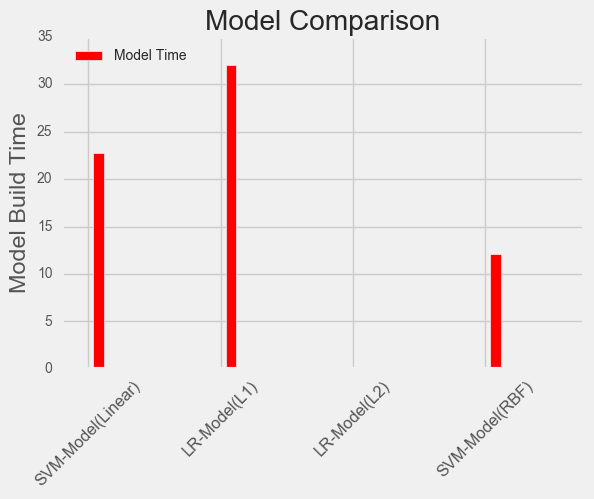

In [95]:
import matplotlib.pyplot as plt
plt.figure()
plt.hold(True)
l = sorted(model_acc, key= model_acc.get)

y1 = []
y2 = []

for model in l:
    y1.append(model_acc[model]*100)
    y2.append(model_time[model])

plt.style.use('fivethirtyeight')
plt.bar(np.linspace(1,20,4),y1, width = 0.5, color = 'blue')
plt.xticks(np.linspace(1,20,4)+0.25*np.ones(4) , l, size='small',rotation= 45)
plt.ylabel('Model Accuracy')
plt.title('Model Comparison')
plt.legend(['Model Accuracy'], loc = 2)
plt.show()

plt.figure()
plt.hold(True)
plt.bar(np.linspace(1,20,4) + 0.5*np.ones(4),y2, width = 0.5, color = 'red')
plt.xticks(np.linspace(1,20,4)+0.25*np.ones(4) , l, size='small',rotation= 45)
plt.ylabel('Model Build Time')
plt.title('Model Comparison')
plt.legend(['Model Time'], loc = 2)
plt.show()
    
    

### SVM has a clear advantage when sample size is smaller for a dataset with many features. SVM while being robust to noise is also computationally expensive and will run slower than Logistic regression.  As one would expect the more robust L1 which considers multiple solutions as opposed to L2 is taking more time.
### This can be seen from the plot above.

## Grid Search for finding optimal values of model parameters - Exceptional Item (Rubric)

In [33]:
%matplotlib inline
from __future__ import print_function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

cv_object = ShuffleSplit(n_splits=1,
                         test_size  = 0.2,random_state=0)                       
print(cv_object)

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

tuned_parameters = [{'kernel': ['linear'], 'C': [0.05,0.5,1,3,5]}]
## RBF took longer time so we dicided to use liner kernal only in the interest of keeping the model robust.

#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


Automatically created module for IPython interactive environment
ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None)


In [34]:
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print("Detailed classification report:")

    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")

    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))




# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'C': 0.05, 'kernel': 'linear'}
Grid scores on development set:
0.635 (+/-0.015) for {'C': 0.05, 'kernel': 'linear'}
0.628 (+/-0.020) for {'C': 0.5, 'kernel': 'linear'}
0.623 (+/-0.017) for {'C': 1, 'kernel': 'linear'}
0.628 (+/-0.017) for {'C': 3, 'kernel': 'linear'}
0.625 (+/-0.019) for {'C': 5, 'kernel': 'linear'}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
             precision    recall  f1-score   support

      False       0.63      0.74      0.68      1608
       True       0.65      0.52      0.58      1486

avg / total       0.64      0.64      0.63      3094

# Tuning hyper-parameters for recall
Best parameters set found on development set:
{'C': 0.05, 'kernel': 'linear'}
Grid scores on development set:
0.628 (+/-0.015) for {'C': 0.05, 'kernel': 'linear'}
0.624 (+/-0.020) for {'C': 0.5, 'kernel': 'lin

#### _From our finite set Grid Search analysis, shown above, we could see that the optimal precision of the model was achieved when the parameters were set to linear Kernel and the soft margin parameter C at 0.05._

## 3. - Principal Component Analysis (PCA) - Exceptional Item

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype object was converted to float64 by the scale function.



PC axes in terms of the measurement axes scaled by the standard deviations:
 [[  2.80673229e-02  -5.92058557e-02  -1.56638104e-01  -1.14794397e-01
   -2.19409771e-01   1.03231225e-01   6.24899127e-02   8.80629567e-04
    7.12382527e-02   2.64282095e-01   2.57561989e-01   2.86624883e-01
    2.77213571e-01   2.95720153e-01   2.94742243e-01   2.76256806e-01
    2.83961709e-01   2.88972917e-01   2.90932788e-01   2.81100829e-01
    1.28805593e-01]
 [ -4.38869623e-01   3.63577903e-01   3.48726439e-01   4.49776404e-01
    3.24974420e-01  -1.60431324e-01   2.37238946e-01   2.31821084e-01
   -2.23772805e-01   8.48404941e-02   7.31079762e-02   7.09207692e-02
    7.85942491e-02   7.92548249e-02   7.95863468e-02   5.95015575e-02
    7.39101888e-02   5.96018803e-02   6.07869526e-02   7.58168425e-02
    3.85725530e-02]
 [  2.28151296e-01   1.73536560e-01  -5.50755813e-02  -2.69173944e-02
    1.12290167e-01  -6.04539223e-01  -2.82594842e-01  -5.21807007e-01
   -4.04800644e-01   3.94222111e-02   2.483

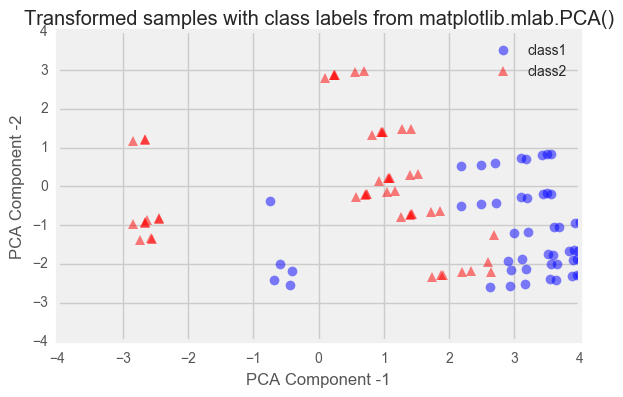

In [57]:
from matplotlib.mlab import PCA as mlabPCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
plt.figure()
plt.hold(True)

data = match_players_11
#del data['Home_win']
#del data['Match_year']
#print(data.info())

mlab_pca = mlabPCA(scale(data.values))
print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:50,0],mlab_pca.Y[0:50,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[50:100,0], mlab_pca.Y[50:100,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('PCA Component -1')
plt.ylabel('PCA Component -2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

#### _ We are picking 100 samples and plotting them against first two principal components to understand classes they belong to._

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype object was converted to float64 by the scale function.



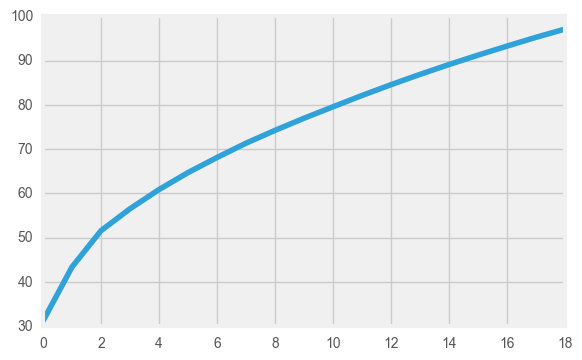

In [58]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

pca = PCA(n_components=19)
pca.fit(scale(match_players_11.values))

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)


In [64]:
#Looking at the above plot we are taking 8 components which explains roughly 75% variance
pca = PCA(n_components=8)
pca.fit(scale(match_players_11.values))
X1=pca.fit_transform(scale(match_players_11.values))

print (X1[0:8])

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype object was converted to float64 by the scale function.



[[ 0.74964965 -0.37692046  1.1674501  -1.18031634 -0.91421825  0.94081778
   0.28190505  0.3044545 ]
 [ 0.40134145 -2.19894523  2.19169367  0.68211733 -0.89401118  0.70513075
  -1.77232833 -1.54298824]
 [ 0.44010249 -2.54081163  1.35697992  1.13178141 -0.86118588 -0.06727332
  -0.18766111  0.05414253]
 [ 0.59436813 -1.99870486  0.53324704  0.89045646 -0.83323891 -0.5511217
   0.70366056  1.46092747]
 [ 0.68333335 -2.41707884 -1.32755224  0.77409047 -1.0857295   1.45993396
  -0.89909776  0.20199165]
 [-3.56208945 -0.1962763  -2.02486883  1.45735486  0.33838329  0.47123468
   0.61000039  0.76983901]
 [-3.55468487  0.8235069  -0.5920257  -0.3760916   0.36649092  1.29873697
  -0.73416552  1.74787686]
 [-4.01014082 -2.30190981  0.84997962  2.67743841  0.61920125 -0.93542099
  -1.78938683 -0.51664409]]


# Advantages of each model
 
Both SVM and Logistic Regression have their advantages and disadvantages. First, we evaluate Logistic Regression.
## Logistic Regression Advantages

*        Independent variable and dependent variable linear relationship is not assumed
*        Dependent variable does not need to be Gaussian
*        No homogeneity of variance is assumed
*        Provides probabilistic outcomes or odds ratios

## Logistic Regression Disadvantages  

*        Independence of the variables play a role in its predictive capabilities
*        Higher accuracy necessitates larger datasets
*        Best for categorical outcomes rather than continuous
*        Prone to overfitting and sampling bias
*        Not robust to outliers
*        No methods to auto select of best variables
 
Now we look at the SVM advantages and disadvantages.
## SVM Advantages  

*        Higher prediction accuracy
*        Robust algorithm generalizes well. As in small changes to data does not effect the hyperplane much
*        Naturally resistant to overfitting
*        Faster once learning is done

## SVM Disadvantages  

*        Computationally expensive. Resulting in longer training times
*        Interpretation of weights is not straight forward
*        Some Kernels are sensitive to overfitting
 
Considering data distributions, when classes are (nearly) separable, SVM does better than Logistic Regression. SVMs are not probabilistic. So, if estimation of probabilities is desired, Logistic Regression would be the choice to go with. For nonlinear boundaries, Kernel SVMs seem to be the popular choice [8].
 
Considering features and data sizes, when the number of attributes is larger than the training dataset then Logistic Regression (or SVM with a linear Kernel) is best suited. If the number of attributes is small and the training dataset is intermediate (1K – 10K) using SVM with a Gaussian Kernel will produce optimal results. If the number of attributes is small and the training dataset is large (20K+) then Logistic Regression would be a better choice.  (as described by Andrew Ng)

SVM has a  kernel trick that pulls data to a higher dimension allowing a hyperplane to be established when the data is linearly misbehaving. Image below from [10] shows how different kernels can help better classify such data.


In [55]:
from IPython.display import Image
# Here he is, in all his glory:
Image(url='http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_001.png')

# Image(url='http://yann.lecun.com/ex/images/allyourbayes.jpg')

Logistic Regression maximizes probability where as SVM tries to find the hyperplane to separate the classes with some tricks of its own. With its kernel trick and cost/gamma adjustments, SVM is a better fit for smaller data. 

Which method to use largely depends on the data in question.  But in general, SVM has a clear advantage when the sample size is small with a higher number of attributes. SVM while being robust to noise is computationally expensive and will run slower than Logistic Regression in training. Logistic Regression on the other hand seem to be used widely in 'Big data'.

# References 
1. https://www.kaggle.com/hugomathien/soccer
2. https://en.wikipedia.org/wiki/Oldest_football_clubs 
3. https://www.kaggle.com/drgilermo/d/hugomathien/soccer/home-advantage-by-country
4. http://www.football-data.co.uk/notes.txt
5. http://www.scipy-lectures.org/packages/scikit-learn/
6. https://plot.ly/ipython-notebooks/principal-component-analysis/
7. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html> 
8. http://cmj4.web.rice.edu/SVM.pdf 
9. https://www.cs.cmu.edu/~schneide/tut5/node42.html
10. http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html 
